# Mortality by place, Italy

## Introduction

In this analysis using **pdnd-nteract** we will present some data regarding the current state (updated to 2016) and evolution in recent years of causes of death in Italy, both from a national and from a provincial level.

This dataset is provided by the Italian National Institute of Statistics (ISTAT), which is the main producer of official statistics in Italy and it contains Vital statistics on causes of death: The Vital statistics system on causes of death is the main source for the evaluation of the health status of the population, and for the health programs and resources allocation.

Given the considerable size of the [complete dataset](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_CMORTE1_EV), we will use multiple subsets downloaded from the ISTAT tool.

## Let's start
We will start by importing some python libraries:


In [1]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from io import StringIO
pd.options.display.html.table_schema = True
pd.set_option('display.max_rows', None)
import os

Let's take a look at the dataset:

In [2]:
national_df = pd.read_csv(os.path.join('mortality', 'italia2016.csv'))
national_df.head(20)

ITTER107 Territorio TIPO_DATO15 Tipo dato  SEXISTAT1   Sesso CAUSEMORTE_SL  \
0        IT     Italia       DEATH     morti          1  maschi         2_1_8   
1        IT     Italia       DEATH     morti          1  maschi        2_1_14   
2        IT     Italia       DEATH     morti          1  maschi             7   
3        IT     Italia       DEATH     morti          1  maschi         7_1_2   
4        IT     Italia       DEATH     morti          1  maschi           7_4   
5        IT     Italia       DEATH     morti          1  maschi           8_2   
6        IT     Italia       DEATH     morti          1  maschi        17_1_2   
7        IT     Italia       DEATH     morti          1  maschi        17_1_5   
8        IT     Italia       DEATH     morti          1  maschi         2_1_4   
9        IT     Italia       DEATH     morti          1  maschi         2_1_7   
10       IT     Italia       DEATH     morti          1  maschi        2_1_10   
11       IT     Italia       DEATH     morti          1  maschi             6   
12       IT     Italia       DEATH     morti          1  maschi         7_1_1   
13       IT     Italia       DEATH     morti          1  maschi           7_3   
14       IT     Italia       DEATH     morti          1  maschi            16   
15       IT     Italia       DEATH     morti          1  maschi        17_1_1   
16       IT     Italia       DEATH     morti          1  maschi        2_1_16   
17       IT     Italia       DEATH     morti          1  maschi        2_1_19   
18       IT     Italia       DEATH     morti          1  maschi        2_1_22   
19       IT     Italia       DEATH     morti          1  maschi           8_1   

        Causa iniziale di morte - European Short List  TIME  \
0   di cui tumori maligni della trachea, dei bronc...  2016   
1                di cui tumori maligni della prostata  2016   
2                   malattie del sistema circolatorio  2016   
3          du cui altre malattie ischemiche del cuore  2016   
4             altre malattie del sistema circolatorio  2016   
5                                           polmonite  2016   
6                           di cui cadute accidentali  2016   
7                              di cui altri accidenti  2016   
8   di cui tumori maligni del colon, del retto e d...  2016   
9                 di cui tumori maligni della laringe  2016   
10                     di cui tumori maligni del seno  2016   
11  malattie del sistema nervoso e degli organi di...  2016   
12                    di cui infarto miocardico acuto  2016   
13                          malattie cerebrovascolari  2016   
14  sintomi, segni, risultati anomali e cause mal ...  2016   
15                      di cui accidenti di trasporto  2016   
16                di cui tumori maligni della vescica  2016   
17                  di cui morbo di hodgkin e linfomi  2016   
18                        di cui altri tumori maligni  2016   
19                                          influenza  2016   

    Seleziona periodo  Value  Flag Codes  Flags  
0                2016  24059         NaN    NaN  
1                2016   7540         NaN    NaN  
2                2016  96728         NaN    NaN  
3                2016  21851         NaN    NaN  
4                2016  17799         NaN    NaN  
5                2016   5286         NaN    NaN  
6                2016   2060         NaN    NaN  
7                2016   4945         NaN    NaN  
8                2016  10652         NaN    NaN  
9                2016   1424         NaN    NaN  
10               2016    144         NaN    NaN  
11               2016  11954         NaN    NaN  
12               2016  13018         NaN    NaN  
13               2016  22442         NaN    NaN  
14               2016   4863         NaN    NaN  
15               2016   2854         NaN    NaN  
16               2016   4883         NaN    NaN  
17               2016   2931         NaN    NaN  
18               2016  1059

We rename some columns for simplicity.

In [3]:
national_df.columns = ['causa' if x=='Causa iniziale di morte - European Short List' else 
                       'causa_cod' if x=='CAUSEMORTE_SL' else 
                       x for x in national_df.columns]

The dataset's `Sesso` column is divided by male, female and total (sum).

In [4]:
national_df['Sesso'].unique()

array(['maschi', 'totale', 'femmine'], dtype=object)

We can see the total number of causes of death, including macrocategories and subcategories.

In [23]:
len(national_df['causa_cod'].unique())

87

## Macro-causes of death

Here we can see a *bar chart* showing the top macro-causes of death.

In [6]:
national_total_df = national_df[national_df['Sesso'].isin(['totale']) & national_df['Territorio'].isin(['Italia'])]
national_total_df = national_total_df[~national_total_df['causa'].isin(['totale'])]
national_total_df_macro = national_total_df[~national_total_df['causa_cod'].str.contains('_')]
national_total_df_macro = national_total_df_macro[['causa','Value']]
national_total_df_macro

causa   Value
172                  malattie del sistema circolatorio  221914
174  alcune condizioni morbose che hanno origine ne...     891
176       cause esterne di traumatismo e avvelenamento   24352
177           alcune malattie infettive e parassitarie   12850
185     malattie della cute e del tessuto sottocutaneo    1214
188   malformazioni congenite ed anomalie cromosomiche    1232
190                                             tumori  179502
192                disturbi psichici e comportamentali   21535
193                   malattie dell'apparato digerente   22643
201                  malattie del sistema respiratorio   46537
226  malattie del sistema nervoso e degli organi di...   27699
228              malattie dell'apparato genitourinario   10935
229  complicazioni della gravidanza, del parto e de...      13
230  sintomi, segni, risultati anomali e cause mal ...   12806
241     malattie endocrine, nutrizionali e metaboliche   27647
311  malattie del sangue e degli organi ematopoieti...    3103
312  malattie del sistema osteomuscolare e del tess...    3210

This chart shows the top 15 causes broken down in more detail. They are filtered using a regular expression on the `CAUSEMORTE_SL` column.

In [7]:
national_total_df_detailed = national_total_df[national_total_df['causa_cod'].str.match('^\d+_\d+$')]
national_total_df_detailed = national_total_df_detailed[['causa','Value']]
national_total_df_detailed.sort_values('Value', ascending = False).head(15)

causa   Value
179                                     tumori maligni  170286
255                      malattie ischemiche del cuore   66868
236                          malattie cerebrovascolari   56958
200                           altre malattie del cuore   51275
216            altre malattie del sistema circolatorio   46813
208     malattie croniche delle basse vie respiratorie   23710
182                                    diabete mellito   21354
183                                            demenza   19875
203                                          accidenti   19508
194             altre malattie dell'apparato digerente   16191
209            altre malattie del sistema respiratorio   11674
199                              malattia di alzheimer   11482
217                                          polmonite   10837
231  altri sintomi, segni, risultati anomali e caus...   10256
227  altre malattie del sistema nervoso e degli org...    9509

### Tumors break-down

With tumors being among the most common causes of death by a considerable margin, we can plot a chart of the incidence by type and sex.

In [8]:
national_mf = national_df[~national_df['Sesso'].isin(['totale']) & national_df['Territorio'].isin(['Italia'])]
national_mf = national_mf[~national_mf['causa'].isin(['totale'])]
national_mf_tumors = national_mf[national_mf['causa'].str.contains('di cui tumori')]
national_mf_tumors = national_mf_tumors[['Sesso','causa','Value']]
national_mf_tumors = national_mf_tumors.pivot("causa", "Sesso", "Value").fillna(0)
national_mf_tumors

Sesso                                               femmine   maschi
causa                                                               
di cui tumori maligni del cervello e del sistem...   1838.0   2325.0
di cui tumori maligni del colon, del retto e de...   8923.0  10652.0
di cui tumori maligni del fegato e dei dotti bi...   3274.0   6428.0
di cui tumori maligni del pancreas                   6215.0   5834.0
di cui tumori maligni del rene                       1295.0   2422.0
di cui tumori maligni del seno                      12616.0    144.0
di cui tumori maligni dell'esofago                    515.0   1417.0
di cui tumori maligni dell'ovaio                     3260.0      0.0
di cui tumori maligni della cervice uterina           509.0      0.0
di cui tumori maligni della laringe                   184.0   1424.0
di cui tumori maligni della prostata                    0.0   7540.0
di cui tumori maligni della tiroide                   321.0    215.0
di cui tumori maligni della trachea, dei bronch...   9779.0  24059.0
di cui tumori maligni della vescica                  1347.0   4883.0
di cui tumori maligni delle labbra, cavità oral...    988.0   2228.0
di cui tumori maligni dello stomaco                  3823.0   5458.0
di cui tumori maligni di altre parti dell'utero      2621.0      0.0

In [9]:
plt.rcParams['figure.dpi'] = 150

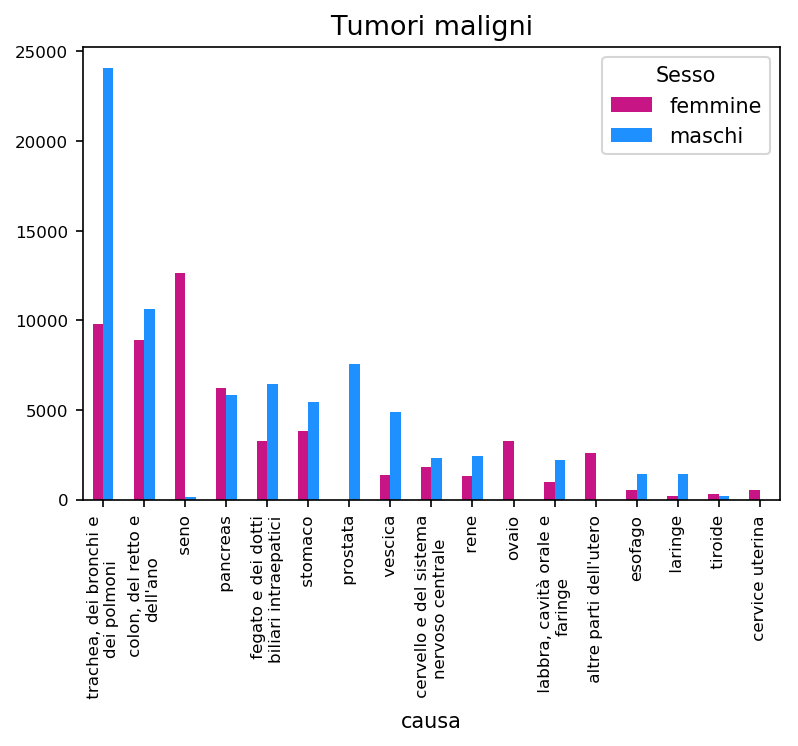

In [10]:
national_mf_tumors.index = national_mf_tumors.index.str.replace("^di cui tumori maligni (della|dello|delle|dell'|di|del)", '', regex = True)
national_mf_tumors = national_mf_tumors.assign(t = national_mf_tumors['maschi'] + national_mf_tumors['femmine']).sort_values('t', ascending = False).drop('t', axis=1)
national_mf_tumors.plot(kind='bar', color=['mediumvioletred', 'dodgerblue'])

plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

from textwrap import fill
labels = [fill(l, 23) for l in national_mf_tumors.index]

plt.gca().set_xticklabels(labels)
plt.title('Tumori maligni',fontsize=13)
plt.show()

## Thematic maps by cause of death in 2016

We prepare the dataset to be used in choropleth visualizations.

Since the dataset aggregates provinces and macro-areas, detailed categories and macro-categories of causes of death, it needs to be streamlined.

In [11]:
national_df_prov = national_df[~national_df['Territorio'].isin(['Italia', 'Nord-ovest', 'Nord-est', 'Centro', 'Sud'])]
national_df_prov = national_df_prov[national_df_prov['ITTER107'].str.len() == 5]
national_df_prov = national_df_prov[~national_df_prov['causa_cod'].str.contains('_')]
national_df_prov

ITTER107                      Territorio TIPO_DATO15 Tipo dato  \
341      IT110           Barletta-Andria-Trani       DEATH     morti   
344      IT110           Barletta-Andria-Trani       DEATH     morti   
352      IT110           Barletta-Andria-Trani       DEATH     morti   
356      IT110           Barletta-Andria-Trani       DEATH     morti   
358      IT110           Barletta-Andria-Trani       DEATH     morti   
361      IT110           Barletta-Andria-Trani       DEATH     morti   
362      IT110           Barletta-Andria-Trani       DEATH     morti   
367      IT110           Barletta-Andria-Trani       DEATH     morti   
375      IT110           Barletta-Andria-Trani       DEATH     morti   
387      IT110           Barletta-Andria-Trani       DEATH     morti   
391      IT110           Barletta-Andria-Trani       DEATH     morti   
394      IT110           Barletta-Andria-Trani       DEATH     morti   
395      IT110           Barletta-Andria-Trani       DEATH     morti   
401      IT110           Barletta-Andria-Trani       DEATH     morti   
405      IT110           Barletta-Andria-Trani       DEATH     morti   
412      IT110           Barletta-Andria-Trani       DEATH     morti   
420      IT109                           Fermo       DEATH     morti   
424      IT109                           Fermo       DEATH     morti   
432      IT109                           Fermo       DEATH     morti   
442      IT109                           Fermo       DEATH     morti   
443      IT109                           Fermo       DEATH     morti   
448      IT109                           Fermo       DEATH     morti   
452      IT109                           Fermo       DEATH     morti   
455      IT109                           Fermo       DEATH     morti   
464      IT109                           Fermo       DEATH     morti   
473      IT109                           Fermo       DEATH     morti   
476      IT109                           Fermo       DEATH     morti   
477      IT109                           Fermo       DEATH     morti   
484      IT109                           Fermo       DEATH     morti   
485      IT109                           Fermo       DEATH     morti   
488      IT109                           Fermo       DEATH     morti   
492      IT109                           Fermo       DEATH     morti   
495      IT109                           Fermo       DEATH     morti   
501      IT109                           Fermo       DEATH     morti   
504      IT109                           Fermo       DEATH     morti   
508      IT109                           Fermo       DEATH     morti   
512      IT109                           Fermo       DEATH     morti   
519      IT109                           Fermo       DEATH     morti   
526      IT109                           Fermo       DEATH     morti   
528      IT109                           Fermo       DEATH     morti   
529      IT109                           Fermo       DEATH     morti   
530      IT109                           Fermo       DEATH     morti   
540      IT109                           Fermo       DEATH     morti   
548      IT109                           Fermo       DEATH     morti   
560      IT109                           Fermo       DEATH     morti   
563      IT109                           Fermo       DEATH     morti   
565      IT109                           Fermo       DEATH     morti   
572      IT109                           Fermo       DEATH     morti   
574      IT109                           Fermo       DEATH     morti   
575      IT109                           Fermo       DEATH     morti   
578      IT109                           Fermo       DEATH     morti   
588      IT109                           Fermo       DEATH     morti   
591      IT109                           Fermo       DEATH     morti   
592      IT109                           Fermo       DEATH     morti   
598      IT109                           Fermo

In [12]:
#TODO delete
len(national_df_prov['Territorio'].unique())

110

In [13]:
map_pr = gpd.read_file(os.path.join('italy_maps', 'CMProv2016_ED50', 'CMprov2016_ED50.shp'))
map_pr.columns = ['desc_pr' if x=='DEN_CMPRO' else x for x in map_pr.columns]
map_pr['desc_pr']

0                     Torino
1                   Vercelli
2                     Novara
3                      Cuneo
4                       Asti
5                Alessandria
6                      Aosta
7                    Imperia
8                     Savona
9                     Genova
10                 La Spezia
11                    Varese
12                      Como
13                   Sondrio
14                    Milano
15                   Bergamo
16                   Brescia
17                     Pavia
18                   Cremona
19                   Mantova
20                   Bolzano
21                    Trento
22                    Verona
23                   Vicenza
24                   Belluno
25                   Treviso
26                   Venezia
27                    Padova
28                    Rovigo
29                     Udine
30                   Gorizia
31                   Trieste
32                  Piacenza
33                     Parma
34        Regg

In [14]:
national_df_prov[~national_df_prov['Territorio'].isin(map_pr['desc_pr'])]['Territorio'].unique()

array(["Valle d'Aosta / Vallée d'Aoste", 'Bolzano / Bozen',
       'Forlì-Cesena', 'Massa-Carrara'], dtype=object)

In [15]:
map_pr[~map_pr['desc_pr'].isin(national_df_prov['Territorio'])]['desc_pr']

6             Aosta
20          Bolzano
39    Forli'-Cesena
44    Massa Carrara
Name: desc_pr, dtype: object

In [16]:
map_pr['desc_pr'] = map_pr['desc_pr'].replace({"Aosta": "Valle d'Aosta / Vallée d'Aoste", 'Bolzano': 'Bolzano / Bozen', "Forli'-Cesena":'Forlì-Cesena', 'Massa Carrara':'Massa-Carrara'})

### Malattie del sistema circolatorio

In [17]:
prov_sis_circolatorio = national_df_prov[national_df_prov['causa'].isin(['malattie del sistema circolatorio']) & national_df_prov['Sesso'].isin(['totale'])]
prov_sis_circolatorio

ITTER107                      Territorio TIPO_DATO15 Tipo dato  \
341      IT110           Barletta-Andria-Trani       DEATH     morti   
501      IT109                           Fermo       DEATH     morti   
819      IT108           Monza e della Brianza       DEATH     morti   
1372     ITC11                          Torino       DEATH     morti   
1592     ITC12                        Vercelli       DEATH     morti   
1800     ITC15                          Novara       DEATH     morti   
2401     ITC16                           Cuneo       DEATH     morti   
2461     ITC14            Verbano-Cusio-Ossola       DEATH     morti   
2675     ITC13                          Biella       DEATH     morti   
2956     ITC18                     Alessandria       DEATH     morti   
2998     ITC17                            Asti       DEATH     morti   
3574     ITC20  Valle d'Aosta / Vallée d'Aoste       DEATH     morti   
3893     ITC31                         Imperia       DEATH     morti   
3981     ITC32                          Savona       DEATH     morti   
4255     ITC33                          Genova       DEATH     morti   
4701     ITC34                       La Spezia       DEATH     morti   
4975     ITC41                          Varese       DEATH     morti   
5167     ITC44                         Sondrio       DEATH     morti   
5350     ITC42                            Como       DEATH     morti   
5531     ITC43                           Lecco       DEATH     morti   
5690     ITC45                          Milano       DEATH     morti   
6585     ITC47                         Brescia       DEATH     morti   
6587     ITC49                            Lodi       DEATH     morti   
7009     ITC4B                         Mantova       DEATH     morti   
7303     ITC46                         Bergamo       DEATH     morti   
7475     ITC48                           Pavia       DEATH     morti   
7696     ITC4A                         Cremona       DEATH     morti   
7920     ITD10                 Bolzano / Bozen       DEATH     morti   
8414     ITD20                          Trento       DEATH     morti   
8702     ITD31                          Verona       DEATH     morti   
9044     ITD33                         Belluno       DEATH     morti   
9216     ITD32                         Vicenza       DEATH     morti   
9403     ITD34                         Treviso       DEATH     morti   
9404     ITD35                         Venezia       DEATH     morti   
9890     ITD36                          Padova       DEATH     morti   
10728    ITD42                           Udine       DEATH     morti   
10730    ITD43                         Gorizia       DEATH     morti   
10731    ITD44                         Trieste       DEATH     morti   
11026    ITD41                       Pordenone       DEATH     morti   
11447    ITD51                        Piacenza       DEATH     morti   
11802    ITD52                           Parma       DEATH     morti   
12030    ITD53              Reggio nell'Emilia       DEATH     morti   
12221    ITD54                          Modena       DEATH     morti   
12381    ITD37                          Rovigo       DEATH     morti   
12383    ITD55                         Bologna       DEATH     morti   
13182    ITD56                         Ferrara       DEATH     morti   
13463    ITD57                         Ravenna       DEATH     morti   
13689    ITD58                    Forlì-Cesena       DEATH     morti   
13691    ITD59                          Rimini       DEATH     morti   
14477    ITE11                   Massa-Carrara       DEATH     morti   
14744    ITE12                           Lucca       DEATH     morti   
15003    ITE13                         Pistoia       DEATH     morti   
15005    ITE14                         Firenze       DEATH     morti   
15439    ITE15                           Prato       DEATH     morti   
15684    ITE16                         Livorno

In [18]:
merged_prov_sis_circolatorio = pd.merge(map_pr, prov_sis_circolatorio, left_on='desc_pr', right_on='Territorio')

In [19]:
#TODO density

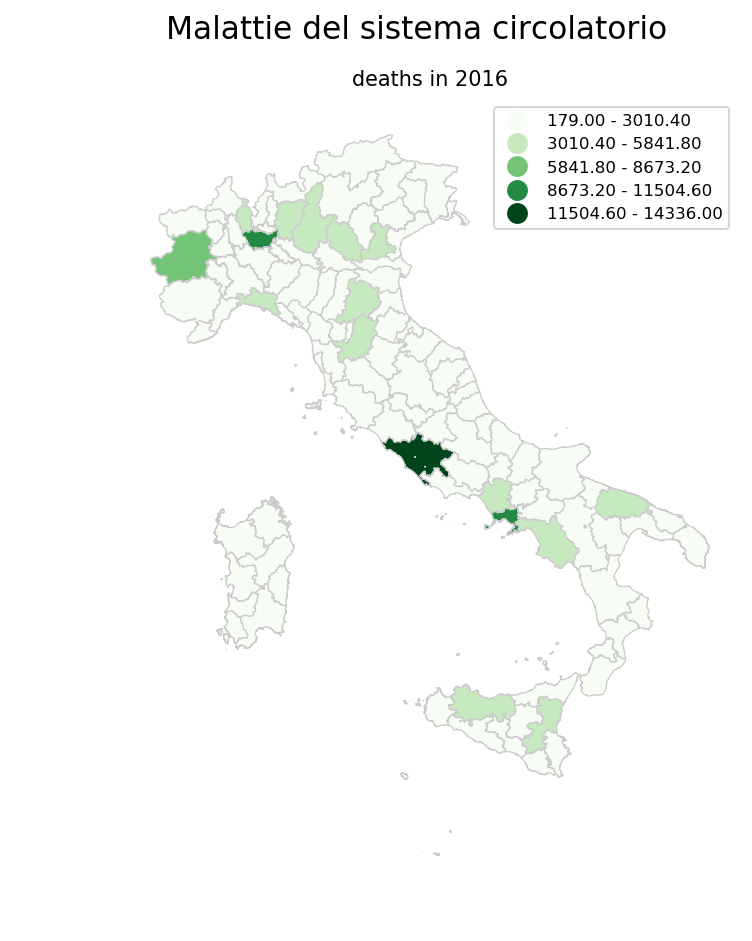

In [20]:
variable = 'Value'
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.axis('off')
normalize = matplotlib.colors.Normalize(vmin=0, vmax=2)

plt.suptitle('Malattie del sistema circolatorio',fontsize=15, y=0.96)
plt.title('deaths in 2016',fontsize=10)


merged_prov_sis_circolatorio.plot(column=variable, cmap='Greens', scheme='equal_interval', linewidth=0.6, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'fontsize': 8})

### 

### Tumori

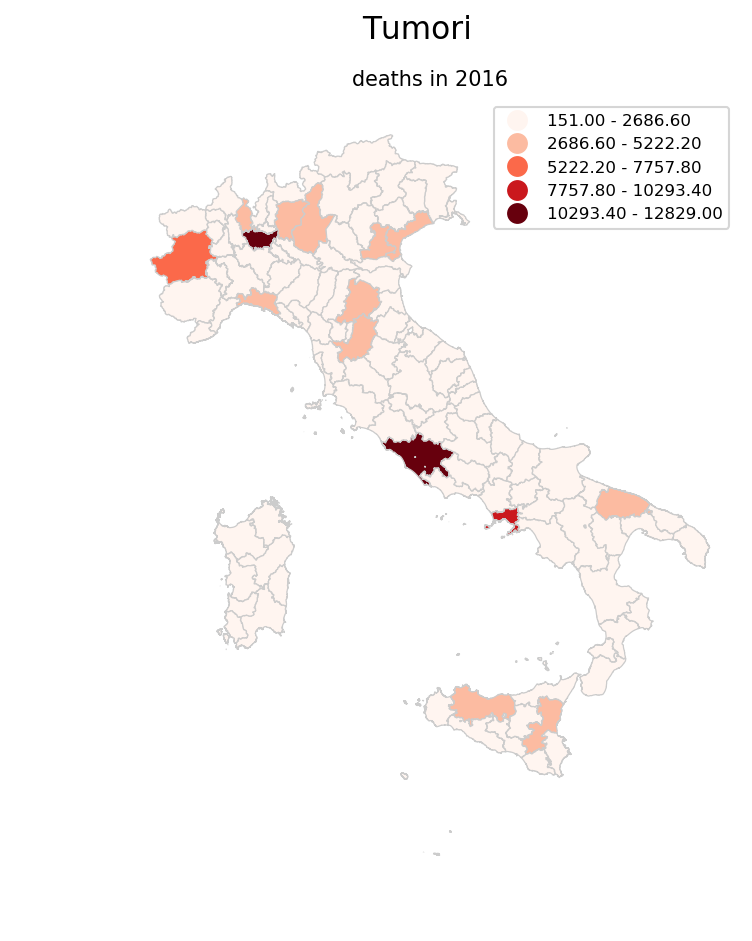

In [26]:
prov_tumori = national_df_prov[national_df_prov['causa'].isin(['tumori']) & national_df_prov['Sesso'].isin(['totale'])]
merged_prov_tumori = pd.merge(map_pr, prov_tumori, left_on='desc_pr', right_on='Territorio')
variable = 'Value'
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.axis('off')
normalize = matplotlib.colors.Normalize(vmin=0, vmax=2)

plt.suptitle('Tumori',fontsize=15, y=0.96)
plt.title('deaths in 2016',fontsize=10)


merged_prov_tumori.plot(column=variable, cmap='Reds', scheme='equal_interval', linewidth=0.6, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'fontsize': 8})

## Evolution of causes of death, 2003-2016

Now we present some *line charts* showing the trend for two causes of death , specifically AIDS and lung tumors, for the period 2003-2016.

In [51]:
trend_df = pd.read_csv(os.path.join('mortality', 'italia_aids_tumori_polmoni_ 2003_2016.csv'))
trend_df.columns = ['causa' if x=='Causa iniziale di morte - European Short List' else 
                       x for x in trend_df.columns]
trend_df = trend_df[['Sesso', 'causa', 'TIME', 'Value']]

trend_AIDS = trend_df[trend_df['causa'] == 'aids (malattia da hiv)']
trend_tumori_polmone = trend_df[trend_df['causa'] == 'di cui tumori maligni della trachea, dei bronchi e dei polmoni']

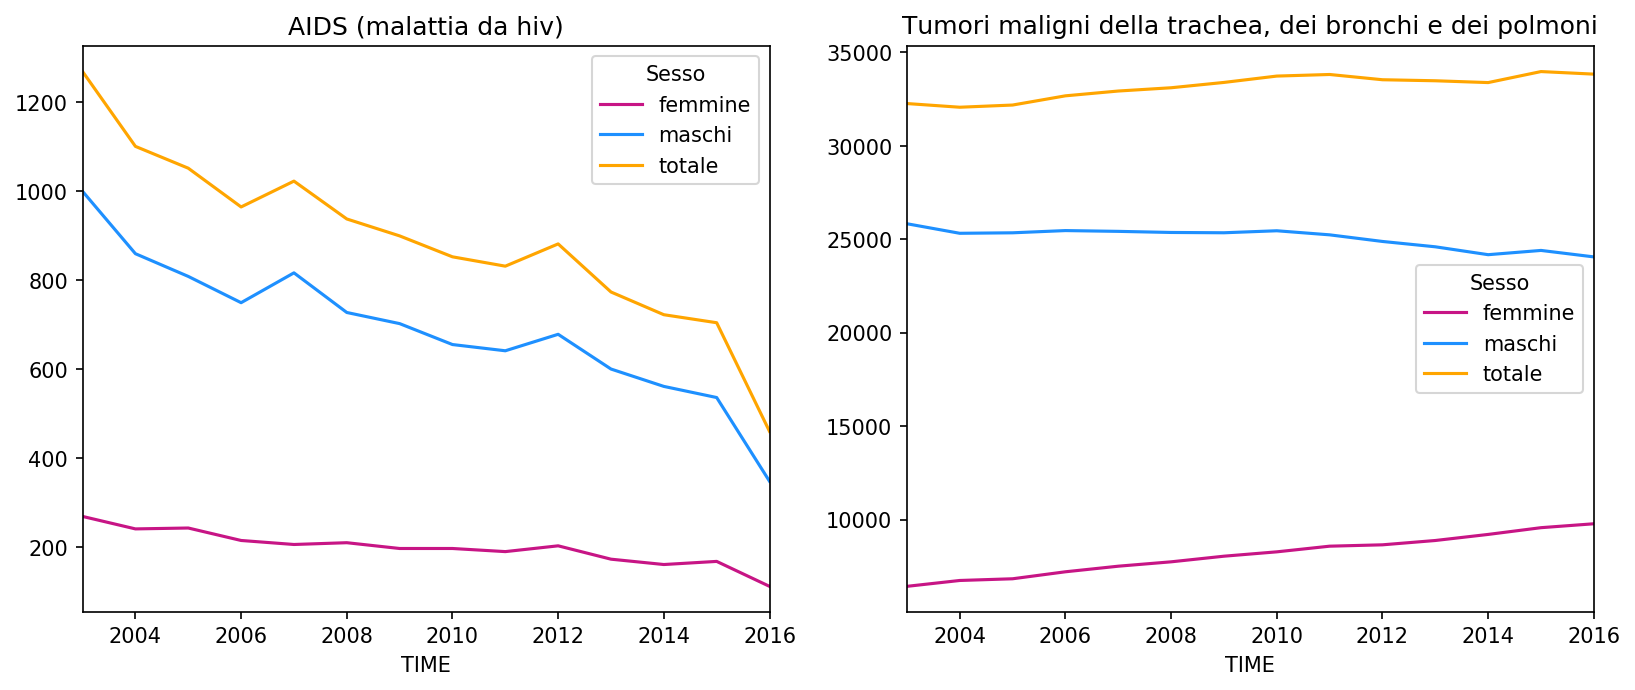

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.set_title('AIDS (malattia da hiv)')
ax2.set_title('Tumori maligni della trachea, dei bronchi e dei polmoni')

trend_AIDS_p = trend_AIDS.pivot("TIME", "Sesso", "Value").fillna(0)
trend_tumori_polmone_p = trend_tumori_polmone.pivot("TIME", "Sesso", "Value").fillna(0)

trend_AIDS_p.plot(ax=ax1, color=['mediumvioletred', 'dodgerblue', 'orange'])
trend_tumori_polmone_p.plot(ax=ax2, color=['mediumvioletred', 'dodgerblue', 'orange'])

Using this kind of visualization it's easy to grasp trends such as the significant decrease in AIDS mortality in recent years.